# SGD

In [3]:
from cardio_datasets import full_dataset, reduced_dataset, categorial_dataset, continuous_dataset
from model_selection_and_evaluation_functions import create_train_test_eval_split, search_score_and_evalute_parameters, show_classification_evaluation_metrics

import numpy
import joblib
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures

## Datasets

In [4]:
categorial_dataset_X_y = create_train_test_eval_split(categorial_dataset, 'cardio')
continuous_dataset_X_y = create_train_test_eval_split(continuous_dataset, 'cardio')
full_dataset_X_y = create_train_test_eval_split(full_dataset, 'cardio')
reduced_dataset_X_y = create_train_test_eval_split(reduced_dataset, 'cardio')

## Hyper parameter tuning

In [5]:
BaseSGDClassifier = SGDClassifier(max_iter=100000, random_state=1338, penalty='elasticnet')

In [12]:
SGDClassifier_grid_parameters_1 = {
    "SGDClassifier__l1_ratio": list(numpy.linspace(0,1,10)),
}

              precision    recall  f1-score   support

           0       0.68      0.85      0.75      7279
           1       0.78      0.58      0.67      6938

    accuracy                           0.72     14217
   macro avg       0.73      0.71      0.71     14217
weighted avg       0.73      0.72      0.71     14217



,param_SGDClassifier__l1_ratio,mean_test_score,std_test_score
0,0.888889,0.633455,0.024113
1,0.0,0.630961,0.029765
2,0.777778,0.630474,0.032332
3,0.444444,0.629015,0.034023
4,0.555556,0.628771,0.031931
5,0.666667,0.627433,0.030736
6,0.111111,0.627190,0.031894
7,1.0,0.627129,0.031931
8,0.222222,0.626703,0.030033
9,0.333333,0.622019,0.037238


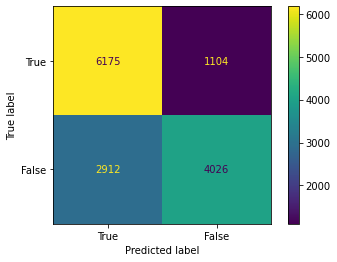

In [8]:
SGDClassifier_StandardScaler_pipeline = Pipeline(
    [
        ("StandardScaler", StandardScaler()),
        ("SGDClassifier", BaseSGDClassifier),
    ]
)
(
    SGDClassifier_model_1,
    SGDClassifier_model_1_scores,
    SGDClassifier_model_1_scores_raw,
) = search_score_and_evalute_parameters(
    reduced_dataset_X_y["eval_split"]["X_train"],
    reduced_dataset_X_y["eval_split"]["X_test"],
    reduced_dataset_X_y["eval_split"]["y_train"],
    reduced_dataset_X_y["eval_split"]["y_test"],
    SGDClassifier_StandardScaler_pipeline,
    SGDClassifier_grid_parameters_1,
    "recall",
)
SGDClassifier_model_1_scores

              precision    recall  f1-score   support

           0       0.70      0.82      0.75      7279
           1       0.77      0.63      0.69      6938

    accuracy                           0.73     14217
   macro avg       0.73      0.72      0.72     14217
weighted avg       0.73      0.73      0.72     14217



,param_SGDClassifier__l1_ratio,mean_test_score,std_test_score
0,0.555556,0.639112,0.044120
1,1.0,0.631387,0.031497
2,0.666667,0.622324,0.029103
3,0.777778,0.621472,0.029656
4,0.0,0.619769,0.028142
5,0.888889,0.619100,0.028529
6,0.444444,0.619039,0.028163
7,0.333333,0.618674,0.029452
8,0.111111,0.618552,0.029219
9,0.222222,0.618552,0.030495


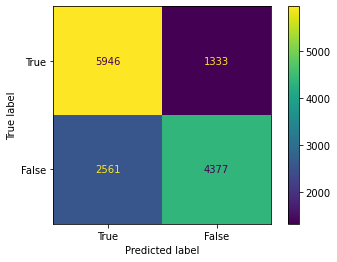

In [9]:
SGDClassifier_MinMaxScaler_pipeline = Pipeline(
    [
        ("MinMaxScaler", MinMaxScaler()),
        ("SGDClassifier", BaseSGDClassifier),
    ]
)
(
    SGDClassifier_model_2,
    SGDClassifier_model_2_scores,
    SGDClassifier_model_2_scores_raw,
) = search_score_and_evalute_parameters(
    reduced_dataset_X_y["eval_split"]["X_train"],
    reduced_dataset_X_y["eval_split"]["X_test"],
    reduced_dataset_X_y["eval_split"]["y_train"],
    reduced_dataset_X_y["eval_split"]["y_test"],
    SGDClassifier_MinMaxScaler_pipeline,
    SGDClassifier_grid_parameters_1,
    "recall",
)
SGDClassifier_model_2_scores

In [14]:
SGDClassifier_grid_parameters_2 = {
    "SGDClassifier__l1_ratio": [0, .77, .44, .88],
    "SGDClassifier__class_weight": ['balanced', None],
}

              precision    recall  f1-score   support

           0       0.68      0.85      0.75      7279
           1       0.78      0.58      0.67      6938

    accuracy                           0.72     14217
   macro avg       0.73      0.71      0.71     14217
weighted avg       0.73      0.72      0.71     14217



,param_SGDClassifier__l1_ratio,param_SGDClassifier__class_weight,mean_test_score,std_test_score
0,0.77,balanced,0.634489,0.031263
1,0.88,balanced,0.632968,0.032876
2,0,None,0.630961,0.029765
3,0.44,balanced,0.630535,0.034921
4,0.77,None,0.627616,0.031250
5,0.44,None,0.627068,0.031780
6,0.88,None,0.626582,0.030414
7,0,balanced,0.625852,0.023553


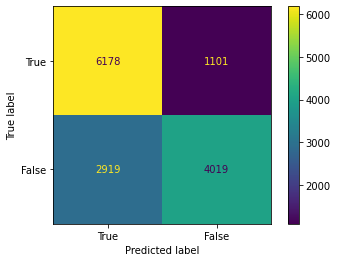

In [15]:
SGDClassifier_StandardScaler_pipeline = Pipeline(
    [
        ("StandardScaler", StandardScaler()),
        ("SGDClassifier", BaseSGDClassifier),
    ]
)
(
    SGDClassifier_model_3,
    SGDClassifier_model_3_scores,
    SGDClassifier_model_3_scores_raw,
) = search_score_and_evalute_parameters(
    reduced_dataset_X_y["eval_split"]["X_train"],
    reduced_dataset_X_y["eval_split"]["X_test"],
    reduced_dataset_X_y["eval_split"]["y_train"],
    reduced_dataset_X_y["eval_split"]["y_test"],
    SGDClassifier_StandardScaler_pipeline,
    SGDClassifier_grid_parameters_2,
    "recall",
)
SGDClassifier_model_3_scores

In [16]:
SGDClassifier_grid_parameters_3 = {
    "SGDClassifier__l1_ratio": [0, .77, .44, .88],
    "SGDClassifier__class_weight": ['balanced', None],
    "PolynomialFeatures__degree": [2,5,6]
}

              precision    recall  f1-score   support

           0       0.65      0.80      0.72      7279
           1       0.72      0.54      0.62      6938

    accuracy                           0.67     14217
   macro avg       0.69      0.67      0.67     14217
weighted avg       0.68      0.67      0.67     14217



,param_SGDClassifier__l1_ratio,param_SGDClassifier__class_weight,param_PolynomialFeatures__degree,mean_test_score,std_test_score
0,0,None,6,0.690572,0.046868
1,0,balanced,5,0.688260,0.042146
2,0,balanced,2,0.684611,0.020864
3,0.77,balanced,2,0.675912,0.043662
4,0.88,balanced,2,0.675852,0.043207
5,0.44,balanced,5,0.674270,0.014483
6,0,None,2,0.673905,0.015817
7,0.77,balanced,5,0.669830,0.014709
8,0.44,None,5,0.665389,0.020577
9,0.88,balanced,5,0.665146,0.010869


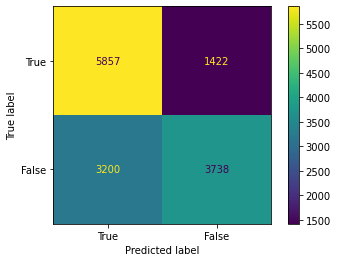

In [19]:
SGDClassifier_PolynomialFeatures_StandardScaler_pipeline = Pipeline(
    [
        ("PolynomialFeatures", PolynomialFeatures()),
        ("StandardScaler", StandardScaler()),
        ("SGDClassifier", BaseSGDClassifier),
    ]
)
(
    SGDClassifier_model_4,
    SGDClassifier_model_4_scores,
    SGDClassifier_model_4_scores_raw,
) = search_score_and_evalute_parameters(
    reduced_dataset_X_y["eval_split"]["X_train"],
    reduced_dataset_X_y["eval_split"]["X_test"],
    reduced_dataset_X_y["eval_split"]["y_train"],
    reduced_dataset_X_y["eval_split"]["y_test"],
    SGDClassifier_PolynomialFeatures_StandardScaler_pipeline,
    SGDClassifier_grid_parameters_3,
    "recall",
)
SGDClassifier_model_4_scores